In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
#loading the csv data to pandas dataframe
heart_data=pd.read_csv("heart_disease_data.csv")


In [6]:
 #print last five rows of dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
#to find rows and columns
heart_data.shape


(303, 14)

In [8]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#check for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#statestical measure about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#splitting features and target
x = heart_data.drop(columns='target',axis=1)
y=heart_data['target']

In [12]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [13]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [14]:
#splitting data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [15]:
#check number of train and test data
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


In [16]:
#to train a machine learning module
model = LogisticRegression()


In [17]:
#training a logistic regression model
model.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [18]:
#model evaluation using accuarecy score
#accurecy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)


In [19]:
print('Accuraecy on training data:',training_data_accuracy)

Accuraecy on training data: 0.8512396694214877


In [20]:
x_test_prediction = model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [21]:
print('Accuraecy on test data:',test_data_accuracy)

Accuraecy on test data: 0.819672131147541


In [22]:
#building a predictive system 
input_data=(62,0,0,138,294,1,1,106,0,1.9,1,3,2)

#change the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshaping the numpy array as we are predicting for only on instances
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshape)
print(prediction)

if(prediction[0]==0):
    print('the person doesnt have heart disese')
else:
        print('the person has heart disease')

[0]
the person doesnt have heart disese


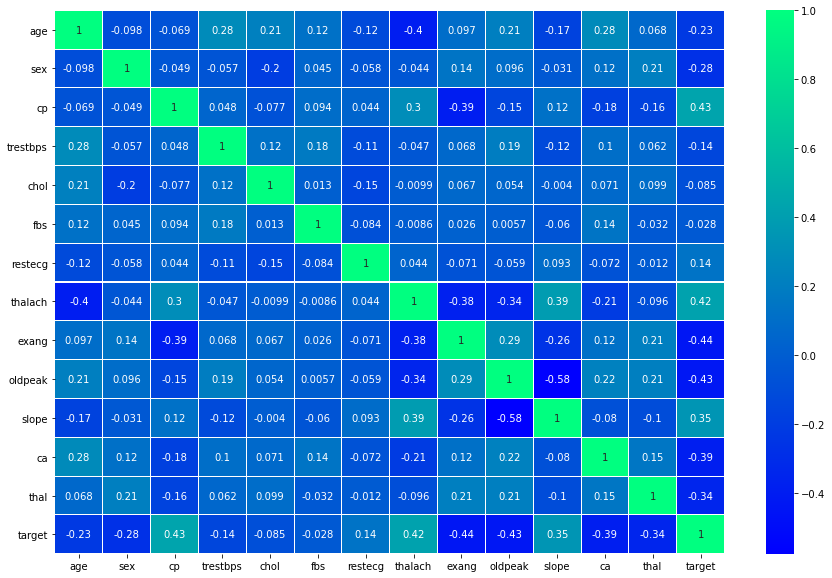

<Figure size 432x288 with 0 Axes>

In [23]:
#to find the correlation between them which will infer imp features
plt.figure(figsize=(15,10))
sns.heatmap(heart_data.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.94      0.94      0.94        33

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61

Testing Accuracy for Decision Tree: 0.9344262295081968
Testing Sensitivity for Decision Tree: 0.9285714285714286
Testing Specificity for Decision Tree: 0.9393939393939394
Testing Precision for Decision Tree: 0.9285714285714286


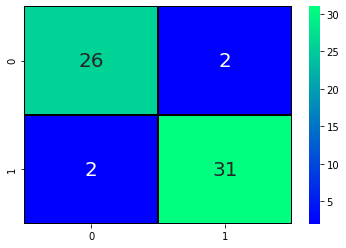

In [24]:
#decision tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, x, y, cv=10, scoring='accuracy')
m=tree_model.fit(x, y)
prediction=m.predict(x_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))


78.69
Testing Accuracy for Random Forest: 0.7868852459016393
Testing Sensitivity for Random Forest: 0.7586206896551724
Testing Specificity for Random Forest: 0.8125
Testing Precision for Random Forest: 0.7857142857142857


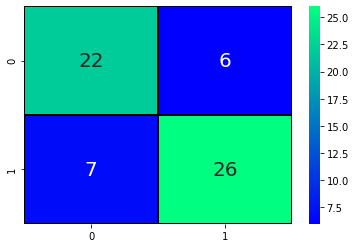

In [25]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(x_train, y_train)
prediction3 = model3.predict(x_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [26]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



Testing Accuracy for SVM: 0.8032786885245902
Testing Sensitivity for Random Forest: 0.8333333333333334
Testing Specificity for Random Forest: 0.7837837837837838
Testing Precision for Random Forest: 0.7142857142857143


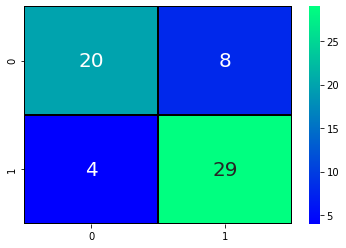

In [27]:
from sklearn.svm import SVC
svm=SVC(C=12,kernel='linear')
model4=svm.fit(x_train,y_train)
prediction4=model4.predict(x_test)
cm4= confusion_matrix(y_test,prediction4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
  
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [28]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [29]:
heart_data.describe(include=[np.number])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



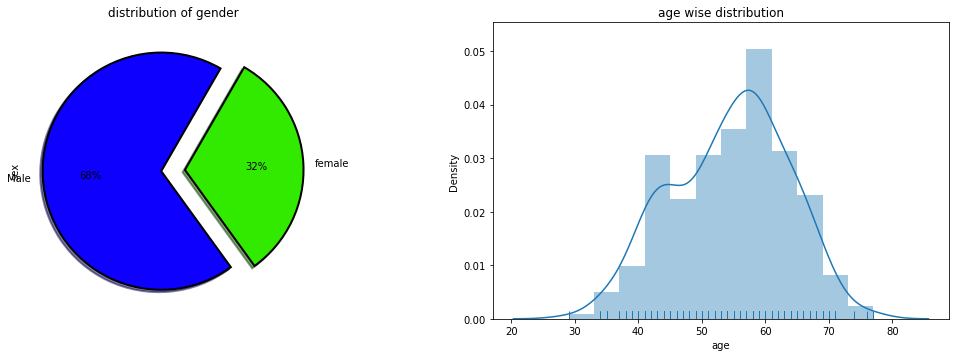

In [30]:
#checking age wise and gender wise distribution
plt.figure(figsize=(18,12))
plt.subplot(221)
heart_data["sex"].value_counts().plot.pie(autopct="%1.0f%%",colors=sns.color_palette("prism",5),startangle=60,labels=["Male","female"],wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow=True)
plt.title("distribution of gender")
plt.subplot(222)
ax=sns.distplot(heart_data['age'],rug=True)
plt.title("age wise distribution")
plt.show()                                                                                                                      

In [31]:
#data cleaning and preprocessing
heart_data['cp'][heart_data['cp'] == 1] = 'typical angina'
heart_data['cp'][heart_data['cp'] == 2] = 'atypical angina'
heart_data['cp'][heart_data['cp'] == 3] = 'non-anginal pain'
heart_data['cp'][heart_data['cp'] == 4] = 'asymptomatic'

heart_data['slope'][heart_data['slope']==1]='upslopping'
heart_data['slope'][heart_data['slope']==2]='flat'
heart_data['slope'][heart_data['slope']==3]='downslopping'

heart_data['restecg'][heart_data['restecg']==0]='normal'
heart_data['restecg'][heart_data['restecg']==1]='ST-T wave abnormality'
heart_data['restecg'][heart_data['restecg']==2]='left ventricular hypertrophy'

heart_data["sex"]=heart_data.sex.apply(lambda x:'male' if x==1 else 'female')

In [32]:
heart_data['slope'].value_counts()

flat          142
upslopping    140
0              21
Name: slope, dtype: int64

In [33]:
heart_data['restecg'].value_counts()

ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: restecg, dtype: int64

In [34]:
heart_data['cp'].value_counts()

0                   143
atypical angina      87
typical angina       50
non-anginal pain     23
Name: cp, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



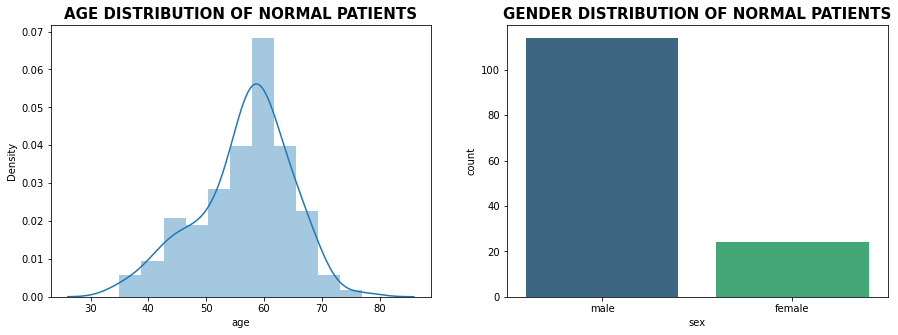

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



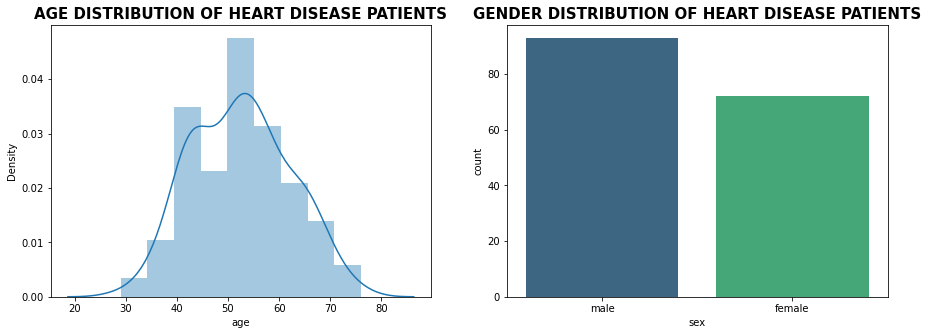

In [35]:
#creating seperate datafeatures for normal and heart patients
attr_1=heart_data[heart_data['target']==1]
attr_0=heart_data[heart_data['target']==0]

#plotting for normal patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS',fontsize=15,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'],palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS',fontsize=15,weight='bold')
plt.show()

#plotting for heart patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS',fontsize=15,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'],palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS',fontsize=15,weight='bold')
plt.show()


In [36]:
import pickle
filename="heart_svm_13.pkl"
pickle.dump(model, open(filename, 'wb'))
load_model=pickle.load(open(filename,'rb'))